In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# data stuff

In [ ]:
import joblib
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import scale

In [ ]:
# Load the joblib files
x = joblib.load('/content/drive/MyDrive/comsnets data csi joint/X.joblib')
data_loc_y = joblib.load('/content/drive/MyDrive/comsnets data csi joint/data_loc_Y.joblib')
data_har_y = joblib.load('/content/drive/MyDrive/comsnets data csi joint/data_har_Y.joblib')
phase = joblib.load('/content/drive/MyDrive/comsnets data csi joint/PHASE.joblib')

In [ ]:
x.shape, data_loc_y.shape, data_har_y.shape, phase.shape

((240, 52, 990), (240,), (240,), (240, 52, 990))

In [ ]:
data_loc_y[:]

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  8,  8,
        8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,
        3,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
       10, 10, 10, 10, 10, 11, 11, 11, 11, 11,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  8,
        8,  8,  8,  8,  9

In [ ]:
data_har_y[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [ ]:
# Transpose x to shape (240, 990, 52)
x_transposed = x.transpose(0, 2, 1)/10.0
phase_transposed = phase.transpose(0, 2, 1)
x_transposed.shape, phase_transposed.shape

((240, 990, 52), (240, 990, 52))

In [ ]:
def lowPassFilter(inputSignalArray):
    filteredOutput = np.zeros(inputSignalArray.shape[0])
    filteredOutput[0] = inputSignalArray[0]
    #print(filteredOutput)
    for i in range(1, inputSignalArray.shape[0]):
        newVal = 0.97*filteredOutput[i-1] + .03*inputSignalArray[i]
        filteredOutput[i] = newVal
    return filteredOutput

In [ ]:
csi_magnitude_filtered = np.apply_along_axis(lowPassFilter, 1, x_transposed)

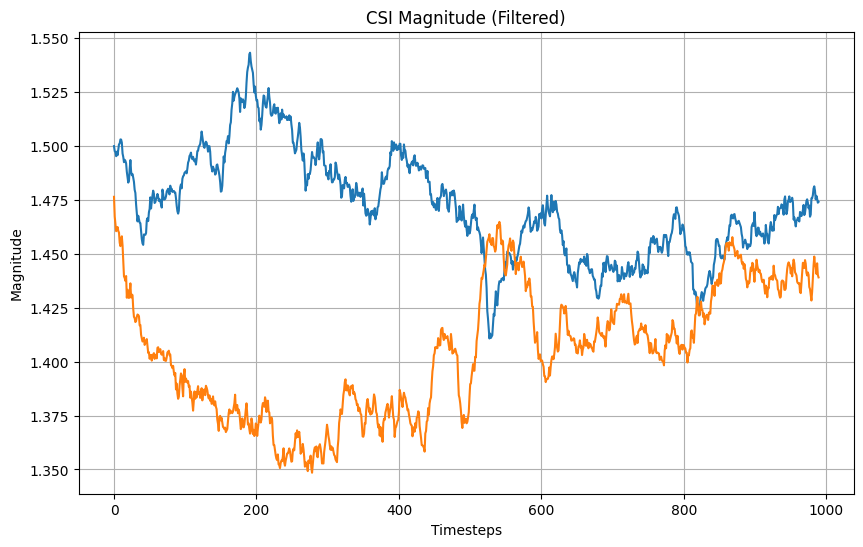

In [ ]:

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
sample_data = csi_magnitude_filtered[0:2, :, 50]  # Select the first sample and first 4 subcarriers

# Create the plot
plt.figure(figsize=(10, 6))
for i in range(sample_data.shape[0]):
  plt.plot(sample_data[i], label=f'Subcarrier {i+1}')

plt.xlabel('Timesteps')
plt.ylabel('Magnitude')
plt.title('CSI Magnitude (Filtered)')
#plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: unwrap each of the Phase data.

# Unwrap the phase data for each sample and subcarrier
phase_unwrapped = np.unwrap(phase_transposed, axis=1)

phase_unwrapped.shape


(240, 990, 52)

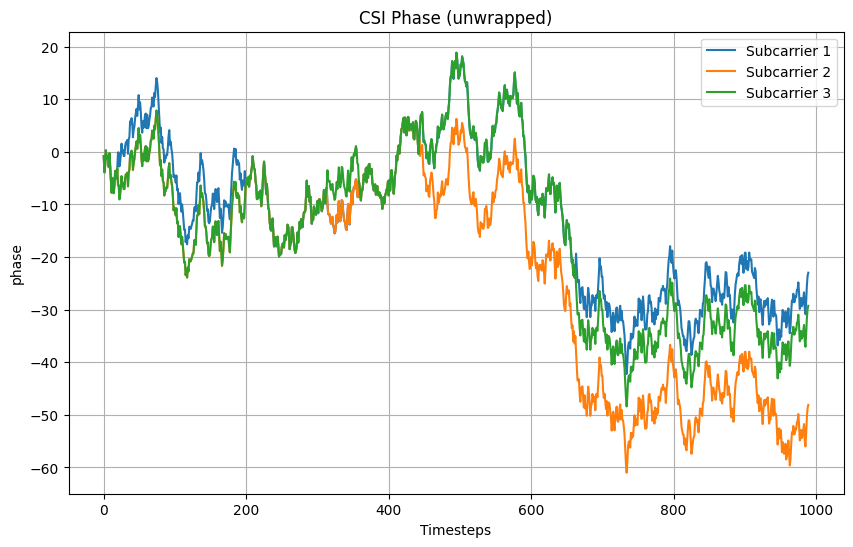

In [ ]:

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
sample_data = phase_unwrapped[0, :, :3]  # Select the first sample and first 4 subcarriers

# Create the plot
plt.figure(figsize=(10, 6))
for i in range(sample_data.shape[1]):
  plt.plot(sample_data[:, i], label=f'Subcarrier {i+1}')
#plt.plot(sample_data[10, :],) #label=f'Subcarrier {i+1}')

plt.xlabel('Timesteps')
plt.ylabel('phase')
plt.title('CSI Phase (unwrapped)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
phase_transposed.shape

(240, 990, 52)

In [ ]:
n_subcarrier = 52
combined = np.concatenate((csi_magnitude_filtered[:, :, :n_subcarrier], phase_unwrapped[:,:,:n_subcarrier]), axis=-1)##np.concatenate((csi_amp_3, csi_phase_3), axis=-1)

In [ ]:
for i in range(combined.shape[0]):
  combined[i] = scale(combined[i], with_mean=True)

combined.shape

(240, 990, 104)

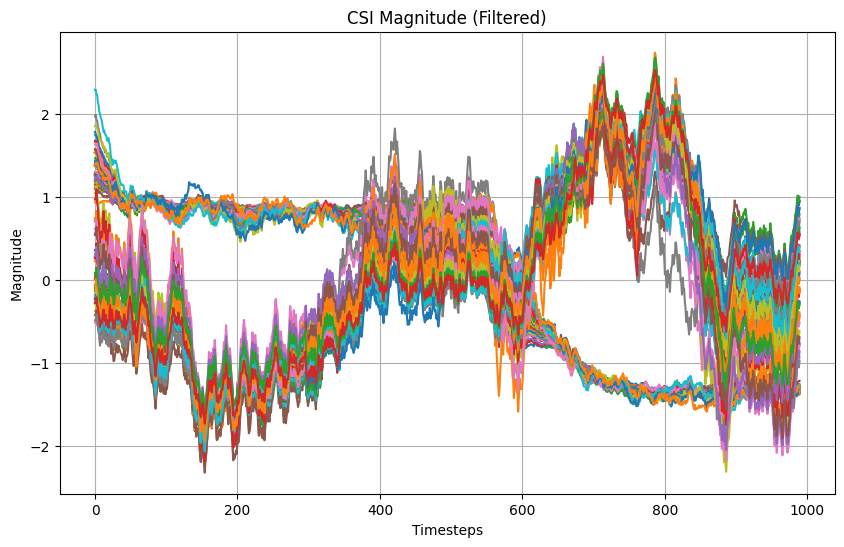

In [ ]:

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
sample_data = combined[10, :, :]  # Select the first sample and first 4 subcarriers

# Create the plot
plt.figure(figsize=(10, 6))
for i in range(sample_data.shape[1]):
  plt.plot(sample_data[:, i], label=f'Subcarrier {i+1}')
#plt.plot(sample_data[10, :],) #label=f'Subcarrier {i+1}')

plt.xlabel('Timesteps')
plt.ylabel('Magnitude')
plt.title('CSI Magnitude (Filtered)')
#plt.legend()
plt.grid(True)
plt.show()


In [ ]:
np.shape(combined)

(240, 990, 104)

In [ ]:
np.array(data_har_y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [ ]:
# Assuming data_har_y is the same as the provided array in the prompt

unique_labels, counts = np.unique(data_har_y, return_counts=True)
print(unique_labels, counts)

[0 1 2 3] [60 60 60 60]


In [ ]:
labels = np.array(data_har_y)

In [ ]:
144/240

0.6

In [ ]:
from sklearn.model_selection import train_test_split

# Assume `X` is your feature set and `y` is the corresponding labels
x_trn, X_T, y_trn, Y_T = train_test_split(
    combined, labels, test_size=0.4, stratify=labels, random_state=902)

print("Shape of x_trn:", x_trn.shape)
print("Shape of y_trn:", y_trn.shape)
print("Shape of X_T:", X_T.shape)
print("Shape of Y_T:", Y_T.shape)

Shape of x_trn: (144, 990, 104)
Shape of y_trn: (144,)
Shape of X_T: (96, 990, 104)
Shape of Y_T: (96,)


In [ ]:
import numpy as np

def deterministic_mixup(data, labels, k=5):
    augmented_data = []
    augmented_labels = []

    unique_classes = np.unique(labels)
    for cls in unique_classes:
        cls_indices = np.where(labels == cls)[0]
        cls_data = data[cls_indices]
        cls_labels = labels[cls_indices]

        for i in range(len(cls_data)):
            for _ in range(k):
                factor = random.uniform(0.7, 0.8)
                j = np.random.choice([idx for idx in range(len(cls_data)) if idx != i])
                mixed_data = factor * cls_data[i] + (1.0 - factor) * cls_data[j]
                mixed_label = cls_labels[i]  # Since both samples belong to the same class

                augmented_data.append(mixed_data)
                augmented_labels.append(mixed_label)

    return np.array(augmented_data), np.array(augmented_labels)

#train_data = np.random.rand(150, 990, 52)
#train_labels = np.random.randint(0, 10, 150)

k = 10  # Number of augmented samples to generate per original sample
x_train, y_train = deterministic_mixup(x_trn, y_trn, k)

print(x_train.shape)
print(y_train.shape)

(1440, 990, 104)
(1440,)


In [ ]:
import tensorflow as tf
n_split = 25
x_train = tf.constant(x_train)
x_val = tf.constant(X_T[:n_split])
x_test = tf.constant(X_T[n_split:])

y_train = tf.constant(y_train)
y_val = tf.constant(Y_T[:n_split])
y_test = tf.constant(Y_T[n_split:])

In [ ]:
# Verify shapes (optional)
print("Shapes:")
print("x_train shape:", np.shape(x_train))
print("x_val shape:", np.shape(x_val))
print("x_test shape:", np.shape(x_test))
print("y_train shape:", np.shape(y_train))
print("y_val shape:", np.shape(y_val))
print("y_test shape:", np.shape(y_test))

Shapes:
x_train shape: (1440, 990, 104)
x_val shape: (25, 990, 104)
x_test shape: (71, 990, 104)
y_train shape: (1440,)
y_val shape: (25,)
y_test shape: (71,)


In [ ]:
a, b = np.unique(y_train, return_counts=True)
print(a, b)

[0 1 2 3] [360 360 360 360]


In [ ]:
a, b = np.unique(y_val, return_counts=True)
print(a, b)

[0 1 2 3] [ 4 11  6  4]


In [ ]:
a, b = np.unique(y_test, return_counts=True)
print(a, b)

[0 1 2 3] [20 13 18 20]


In [ ]:
# Reshape the data to add an extra dimension for the CNN
x_train = np.expand_dims(x_train, axis=-1)  # Shape: (num_samples, 200, 6, 1)
x_val = np.expand_dims(x_val, axis=-1)      # Shape: (num_samples, 200, 6, 1)
x_test = np.expand_dims(x_test, axis=-1)    # Shape: (num_samples, 200, 6, 1)

In [ ]:
# Verify shapes (optional)
print("Shapes:")
print("x_train shape:", np.shape(x_train))
print("x_val shape:", np.shape(x_val))
print("x_test shape:", np.shape(x_test))
print("y_train shape:", np.shape(y_train))
print("y_val shape:", np.shape(y_val))
print("y_test shape:", np.shape(y_test))

Shapes:
x_train shape: (1440, 990, 104, 1)
x_val shape: (25, 990, 104, 1)
x_test shape: (71, 990, 104, 1)
y_train shape: (1440,)
y_val shape: (25,)
y_test shape: (71,)


# Model

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Reshape,  GlobalAveragePooling1D, Masking, Input, MaxPooling1D, GlobalMaxPooling1D, Add, Dropout, BatchNormalization, UpSampling1D, Lambda, Conv2D,Concatenate,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras import models, layers, regularizers, Input

In [ ]:
from tensorflow.keras import layers, models, Input


# Input layer
inputs = Input(shape=(990, int(2*n_subcarrier), 1))
x = layers.AveragePooling2D(pool_size=(5, 1))(inputs)

# Convolutional Layer 1
x = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x) #
x = layers.BatchNormalization()(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)

# Convolutional Layer 2
x = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x) #, padding='same'
x = layers.BatchNormalization()(x)
x_b_T = layers.AveragePooling2D(pool_size=(2, 2))(x)

#x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x) #, padding='same'
#x = layers.BatchNormalization()(x)
#x_b_T = layers.AveragePooling2D(pool_size=(3, 3))(x)

# Dropout Layer
# Flatten the output to feed into fully connected layer
f = layers.Flatten()(x_b_T)
f = layers.Dropout(0.5)(f)

d1 = layers.Dense(128, activation='relu')(f)
d1 = layers.Dropout(0.5)(d1)
# Fully Connected Layer
outputs = layers.Dense(4, activation='sigmoid')(d1)  # Output layer with softmax activation for 276 classes


# Create the model
comsnet_model = models.Model(inputs=inputs, outputs=outputs)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
comsnet_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
comsnet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 990, 104, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 198, 104, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 198, 104, 3)         │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 198, 104, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 99, 52, 3)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 99, 52, 3)           │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 99, 52, 3)           │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 49, 26, 3)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3822)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3822)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         489,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 489,998 (1.87 MB)

 Trainable params: 489,986 (1.87 MB)

 Non-trainable params: 12 (48.00 B)

In [ ]:
# Define the early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=400, restore_best_weights=True)

# Train the model
history = comsnet_model.fit(
    np.array(x_train), np.array(y_train),
    validation_data=(x_val, y_val),
    epochs=2000,
    batch_size=64,
    callbacks=[callback]
)

Epoch 1/2000
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.5069 - loss: 1.7163 - val_accuracy: 0.4400 - val_loss: 1.3115
Epoch 2/2000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8862 - loss: 0.3327 - val_accuracy: 0.4800 - val_loss: 1.2048
Epoch 3/2000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9613 - loss: 0.1102 - val_accuracy: 0.4400 - val_loss: 1.1691
Epoch 4/2000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9825 - loss: 0.0557 - val_accuracy: 0.4400 - val_loss: 1.1786
Epoch 5/2000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9870 - loss: 0.0459 - val_accuracy: 0.4400 - val_loss: 1.2049
Epoch 6/2000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9873 - loss: 0.0476 - val_accuracy: 0.4800 - val_loss: 1.1170
Epoch 7/2000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9909 - loss: 0.0261 - val_accuracy: 0.4400 - val_loss: 1.1398
Epoch 8/2000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9969 - loss: 0.0167 - val_ac

In [ ]:
comsnet_model.evaluate(np.array(x_test), np.array(y_test))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step - accuracy: 0.6732 - loss: 3.5277


[2.9335286617279053, 0.6901408433914185]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


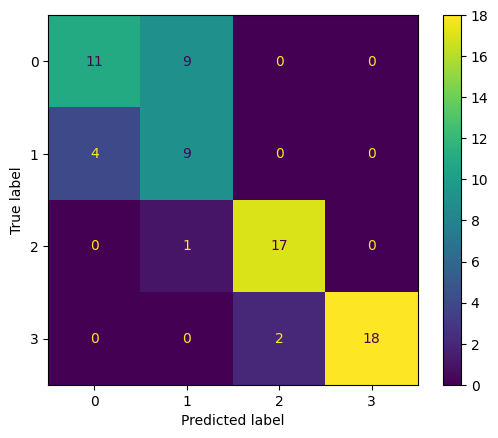

In [ ]:
# prompt: plot the confusion matrix for model's. predictions on x_test taking y_test to be the true labels

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = comsnet_model.predict(np.array(x_test))
y_pred = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
